In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [86]:
# Define file paths
path1 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data1.csv"
path2 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data2.csv"
path3 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data3.csv"

# Read comma-separated text files into DataFrames
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [87]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [88]:
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [89]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,201704
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,201704
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,201704
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,201704
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,201704


In [90]:
# remove non experiment clients from df2

desired_variation = ['Test', 'Control']
filtered_df2 = df2[df2['Variation'].isin(desired_variation)]

In [91]:
# join df1 & df2

df_dem = pd.merge(df1, filtered_df2, how='right', on='client_id')

In [92]:
# join df3 & df2

df_steps = pd.merge(df3, filtered_df2, how='right', on='client_id')

In [93]:
df_dem.shape

(50500, 10)

In [94]:
df_steps.shape

(321309, 7)

In [95]:
df_dem.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,8320017,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,Test
2,4033851,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,Control
3,1982004,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,Test
4,9294070,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,Control


In [96]:
df_steps.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,201704,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,201704,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,201704,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,201704,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,201704,Test


In [97]:
step_order_mapping = {
    'start': 'start_0',
    'step_1': 'step_1',
    'step_2': 'step_2',
    'step_3': 'step_3',
    'confirm': 'step_4'
}

df_steps['step_order'] = df_steps['process_step'].map(step_order_mapping)

In [98]:
df_steps.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation,step_order
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,201704,Test,step_3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,201704,Test,step_2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,201704,Test,step_3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,201704,Test,step_2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,201704,Test,step_3


In [99]:
# save dfs for future use

df_dem.to_csv('df_dem.csv', index=False)
df_steps.to_csv('df_steps.csv', index=False)

In [100]:
selected_rows = df3[df3['client_id'] == 4033851].sort_values(by="date_time")
selected_rows

,client_id,visitor_id,visit_id,process_step,date_time,year_month
72,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00,201704
71,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56,201704
70,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37,201704
69,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:08:56,201704
22,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,201704
23,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:25,201704
20,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,201704
21,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,201704
19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,201704
18,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,201704


Performance Metrics

Success Indicators
You have now been asked to discover what key performance indicators (KPIs) will determine the success of the new design? 
Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant.

Completion Rate: The proportion of users who reach the final ‘confirm’ step.
Time Spent on Each Step: The average duration users spend on each step.
Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
You should consider moving from a later step to an earlier one as an error.

In [101]:
# split df_steps into 2 dfs - control & test

df_steps_control = df_steps[df_steps["Variation"] == "Control"]
df_steps_test = df_steps[df_steps["Variation"] == "Test"]

In [102]:
# Completion rate calcs:

no_users_overall = df_steps["client_id"].nunique()
no_users_control = df_steps_control["client_id"].nunique()
no_users_test = df_steps_test["client_id"].nunique()

print(no_users_overall)
print(no_users_control)
print(no_users_test)

50500
23532
26968


In [103]:
df_steps["process_step"].value_counts()

process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

In [104]:
pivot_df_steps = df_steps.pivot_table(index='step_order', columns='Variation', values='client_id', aggfunc='nunique')

pivot_df_steps

Variation,Control,Test
step_order,,
start_0,23397,26679
step_1,20152,24267
step_2,18650,22258
step_3,17422,20881
step_4,15434,18687


In [105]:
# proportion of users who complete the final step - use client_id

df_dem.groupby("Variation").count()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
Variation,,,,,,,,,
Control,23532,23526,23526,23526,23526,23526,23526,23526,23526
Test,26968,26961,26961,26961,26961,26961,26961,26961,26961


In [106]:
# Completion Rate: The proportion of users who reach the final ‘confirm’ step.

users_start_control = usc = pivot_df_steps.iloc[0,0]
users_start_test = ust = pivot_df_steps.iloc[0,1]

users_confirm_control = ucc = pivot_df_steps.iloc[4,0]
users_confirm_test = uct = pivot_df_steps.iloc[4,1]

conversion_control = round(ucc/usc*100,2)
conversion_test = round(uct/ust*100,2)

print(f"The conversion rate for the control group was {conversion_control}%")
print(f"The conversion rate for the test group was {conversion_test}%")

The conversion rate for the control group was 65.97%
The conversion rate for the test group was 70.04%


In [107]:
# Hypothesis testing - need to create a new df

df_steps_sorted = df_steps.sort_values(by=['client_id', 'visit_id', 'date_time'])

filtered_df_steps_confirm = df_steps_sorted[df_steps_sorted["process_step"]=="confirm"]
filtered_df_steps_confirm = filtered_df_steps_confirm.drop_duplicates(subset=['client_id'], keep='first')
filtered_df_steps_confirm = filtered_df_steps_confirm[["client_id", "process_step", "Variation"]]
filtered_df_steps_confirm["success"] = 1

filtered_df_steps_confirm.head(10)
print(filtered_df_steps_confirm.shape)

(34121, 4)


In [108]:
client_ids_to_remove = filtered_df_steps_confirm["client_id"].tolist()
filtered_df_for_fail = df_steps_sorted[~df_steps_sorted['client_id'].isin(client_ids_to_remove)]

filtered_df_steps_fail = filtered_df_for_fail[filtered_df_for_fail["process_step"]!="confirm"]
filtered_df_steps_fail = filtered_df_steps_fail.drop_duplicates(subset=['client_id'], keep='first')
filtered_df_steps_fail = filtered_df_steps_fail[["client_id", "process_step", "Variation"]]
filtered_df_steps_fail["success"] = 0

filtered_df_steps_fail.head()
print(filtered_df_steps_fail.shape)

(16379, 4)


In [109]:
df_steps["client_id"].nunique()

50500

In [110]:
# H0 - the conversion rate for the control and test group are equal
# H1 - the conversion rate for the control and test group are not equal

In [111]:
success_fail_df = pd.concat([filtered_df_steps_confirm, filtered_df_steps_fail], ignore_index=True)

success_fail_df.tail(10)

,client_id,process_step,Variation,success
50490,9994194,start,Control,0
50491,9994633,start,Test,0
50492,9995265,start,Control,0
50493,9995295,start,Test,0
50494,9996877,start,Control,0
50495,9997391,start,Control,0
50496,9998921,start,Control,0
50497,9999150,start,Test,0
50498,9999626,start,Test,0
50499,9999832,start,Test,0


In [112]:
success_fail_df = pd.concat([filtered_df_steps_confirm, filtered_df_steps_fail], axis=0)

In [113]:
pivot_success_fail_df = pd.pivot_table(success_fail_df, 
                                       index='Variation', 
                                       columns='success', 
                                       values='client_id', 
                                       aggfunc='count', 
                                       margins=True, 
                                       margins_name='Total')

pivot_success_fail_df

success,0,1,Total
Variation,,,
Control,8098,15434,23532
Test,8281,18687,26968
Total,16379,34121,50500


In [114]:
nt = pivot_success_fail_df.iloc[1,2]
nc = pivot_success_fail_df.iloc[0,2]

xt = pivot_success_fail_df.iloc[1,1]
xc = pivot_success_fail_df.iloc[0,1]

nt,nc,xt,xc

(26968, 23532, 18687, 15434)

In [115]:
# H0: success_t = success_c
# H1: success_t != success_c

# use z test

pt = xt/nt
pc = xc/nc

p = (xt+xc)/(nt+nc)

z = (pt-pc)/(p*(1-p)*((1/nt+1/nc)))**0.5

print(z) 

8.8745141890702


In [116]:
import statsmodels.stats.weightstats as ws

test_success = success_fail_df.loc[success_fail_df["Variation"] == "Test", "success"]
control_success = success_fail_df.loc[success_fail_df["Variation"] == "Control", "success"]


z_statistic, p_value = ws.ztest(test_success, control_success)

# Output results
print("Z Statistic:", z_statistic)
print("P-value:", p_value)

Z Statistic: 8.881266522192277
P-value: 6.610335965484932e-19


In [117]:
from scipy import stats

# testing if the difference between the control and test satisfies Vanguard's threshhold of 5%

# H[0]: success_t = 70
# H[1]: success_t < 70

# t = (success_t - 70)/ (std_dev/sqrt(n))

test_success_data = success_fail_df.loc[success_fail_df["Variation"] == "Test", "success"]

# Calculate the standard deviation
std_dev = np.std(test_success_data)

t = (pt-0.7)/(std_dev/(nt**0.5))
p_value = stats.t.cdf(t, nt-1)

t, p_value

(-2.5161474101180903, 0.005935156099500402)

In [118]:
# time taken to complete each step

In [119]:
df_steps_sorted = df_steps.sort_values(by=['client_id', 'visit_id', 'date_time'])

df_steps_sorted.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation,step_order
94261,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,201704,Test,start_0
94260,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,201704,Test,step_1
94259,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,201704,Test,step_2
94258,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,201704,Test,step_3
94257,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,201704,Test,step_4


In [120]:
selected_rows_list = []

for visit_id, group in df_steps_sorted.groupby('visit_id'):
    # Select rows for the current visit_id
    start_rows = group[group['process_step'] == "start"]
    confirm_rows = group[group['process_step'] == "confirm"]
    
    # Check if both start and confirm steps exist in the group
    if not start_rows.empty and not confirm_rows.empty:
        start_time = start_rows["date_time"].iloc[-1]
        finish_time = confirm_rows["date_time"].iloc[0]
        filtered_rows = group[(group['date_time'] >= start_time) & (group['date_time'] <= finish_time)]
        
        selected_rows_list.append(filtered_rows)

# Concatenate the selected rows into a single DataFrame
selected_rows = pd.concat(selected_rows_list)

# Display the resulting DataFrame
print(selected_rows)

        client_id             visitor_id                      visit_id  \
315149    7338123  612065484_94198474375   100019538_17884295066_43909   
315148    7338123  612065484_94198474375   100019538_17884295066_43909   
315147    7338123  612065484_94198474375   100019538_17884295066_43909   
315146    7338123  612065484_94198474375   100019538_17884295066_43909   
315145    7338123  612065484_94198474375   100019538_17884295066_43909   
...           ...                    ...                           ...   
121054    4064969  110735946_42614968419  999985675_64610694964_443659   
121053    4064969  110735946_42614968419  999985675_64610694964_443659   
121052    4064969  110735946_42614968419  999985675_64610694964_443659   
121051    4064969  110735946_42614968419  999985675_64610694964_443659   
121050    4064969  110735946_42614968419  999985675_64610694964_443659   

       process_step            date_time  year_month Variation step_order  
315149        start  2017-04-09 16:

In [121]:
df_steps_analysis = selected_rows.pivot_table(index='client_id', columns='step_order', values='date_time', aggfunc='min')

df_steps_analysis.head(20)

step_order,start_0,step_1,step_2,step_3,step_4
client_id,,,,,
555,2017-04-15 12:57:56,2017-04-15 12:58:03,2017-04-15 12:58:35,2017-04-15 13:00:14,2017-04-15 13:00:34
647,2017-04-12 15:41:28,2017-04-12 15:41:35,2017-04-12 15:41:53,2017-04-12 15:45:02,2017-04-12 15:47:45
1195,2017-04-05 20:15:26,2017-04-05 20:15:59,2017-04-05 20:17:37,2017-04-05 20:18:08,2017-04-05 20:19:31
1197,2017-04-01 17:16:24,2017-04-01 17:16:28,2017-04-01 17:16:34,2017-04-01 17:17:25,2017-04-01 17:17:59
1336,2017-05-08 06:05:12,2017-05-08 06:05:37,2017-05-08 06:06:03,2017-05-08 06:06:54,2017-05-08 06:08:43
1516,2017-04-06 22:14:24,2017-04-06 22:15:20,2017-04-06 22:15:55,2017-04-06 22:26:02,2017-04-06 22:30:18
1643,2017-06-10 07:49:27,2017-06-10 07:50:27,2017-06-10 07:50:43,2017-06-10 08:00:25,2017-06-10 08:00:55
1755,2017-04-02 11:50:21,2017-04-02 11:52:22,2017-04-02 11:52:41,2017-04-02 11:53:08,2017-04-02 11:54:04
1836,2017-04-05 18:47:54,2017-04-05 18:48:00,2017-04-05 18:48:27,2017-04-05 18:48:54,2017-04-05 18:49:51


In [122]:
for col in df_steps_analysis.columns[0:]:
    df_steps_analysis[col] = pd.to_datetime(df_steps_analysis[col])

In [123]:
df_steps_analysis.dtypes

step_order
start_0    datetime64[ns]
step_1     datetime64[ns]
step_2     datetime64[ns]
step_3     datetime64[ns]
step_4     datetime64[ns]
dtype: object

In [124]:
df_time_diffs = pd.DataFrame()

df_time_diffs["start->step1"] = (df_steps_analysis["step_1"]-df_steps_analysis["start_0"]).dt.total_seconds()
df_time_diffs["step1->step2"] = (df_steps_analysis["step_2"]-df_steps_analysis["step_1"]).dt.total_seconds()
df_time_diffs["step2->step3"] = (df_steps_analysis["step_3"]-df_steps_analysis["step_2"]).dt.total_seconds()
df_time_diffs["step3->step4"] = (df_steps_analysis["step_4"]-df_steps_analysis["step_3"]).dt.total_seconds()
df_time_diffs["start->finish"] = (df_steps_analysis["step_4"]-df_steps_analysis["start_0"]).dt.total_seconds()

df_time_diffs = df_time_diffs.sort_values(by="client_id", ascending=True)

print(df_time_diffs)

           start->step1  step1->step2  step2->step3  step3->step4  \
client_id                                                           
555                 7.0          32.0          99.0          20.0   
647                 7.0          18.0         189.0         163.0   
1195               33.0          98.0          31.0          83.0   
1197                4.0           6.0          51.0          34.0   
1336               25.0          26.0          51.0         109.0   
...                 ...           ...           ...           ...   
9998773            11.0          23.0         125.0         136.0   
9998851             7.0          26.0         101.0          31.0   
9999009             8.0          26.0          19.0         118.0   
9999400            22.0          27.0          46.0          24.0   
9999729             5.0          10.0          39.0          21.0   

           start->finish  
client_id                 
555                158.0  
647                37

In [125]:
df_time_diffs2 = pd.merge(df_time_diffs, filtered_df2, how='left', on='client_id')
df_time_diffs2.head(15)

,client_id,start->step1,step1->step2,step2->step3,step3->step4,start->finish,Variation
0,555,7.0,32.0,99.0,20.0,158.0,Test
1,647,7.0,18.0,189.0,163.0,377.0,Test
2,1195,33.0,98.0,31.0,83.0,245.0,Control
3,1197,4.0,6.0,51.0,34.0,95.0,Control
4,1336,25.0,26.0,51.0,109.0,211.0,Test
5,1516,56.0,35.0,607.0,256.0,954.0,Test
6,1643,60.0,16.0,582.0,30.0,688.0,Test
7,1755,121.0,19.0,27.0,56.0,223.0,Test
8,1836,6.0,27.0,27.0,57.0,117.0,Test
9,1936,8.0,13.0,60.0,30.0,111.0,Test


In [126]:
column_averages_grouped = df_time_diffs2.groupby('Variation').mean()
column_averages_grouped

,client_id,start->step1,step1->step2,step2->step3,step3->step4,start->finish
Variation,,,,,,
Control,5.025505e+06,38.551436,157.935209,192.563508,146.735296,535.855235
Test,4.988717e+06,31.152980,274.658690,96.296222,117.289214,518.218672


In [127]:
column_averages_grouped.iloc[0,5]/60

8.93092057719654

In [128]:
total_seconds = column_averages_grouped.iloc[0,5]

# Calculate minutes
minutes = total_seconds // 60

# Calculate remaining seconds
remaining_seconds = total_seconds % 60

print("Minutes:", minutes)
print("Seconds:", remaining_seconds)

Minutes: 8.0
Seconds: 55.85523463179243


In [129]:
column_averages_grouped.iloc[1,5]/60

8.636977861319966

In [130]:
total_seconds = column_averages_grouped.iloc[1,5]

# Calculate minutes
minutes = total_seconds // 60

# Calculate remaining seconds
remaining_seconds = total_seconds % 60

print("Minutes:", minutes)
print("Seconds:", remaining_seconds)

Minutes: 8.0
Seconds: 38.218671679197996


In [131]:
# Ho: test_time = control_time
# H1: test_time < control_time

import statsmodels.stats.weightstats as ws

test_time = df_time_diffs2.loc[df_time_diffs2["Variation"] == "Test", "start->finish"]
control_time = df_time_diffs2.loc[df_time_diffs2["Variation"] == "Control", "start->finish"]

test_time=test_time.dropna()
control_time=control_time.dropna()

z_statistic, p_value = ws.ztest(test_time, control_time)

# Output results
print("Z Statistic:", z_statistic)
print("P-value:", p_value)

# reject null hypothesis and accept H1 - test_time < control_time

Z Statistic: -0.06018821183415293
P-value: 0.9520057342876711


In [132]:
control_time.isnull().sum()

0

In [133]:
# Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 

In [134]:
selected_rows = df3[df3['visit_id'] == "100019538_17884295066_43909"].sort_values(by="date_time")
selected_rows

,client_id,visitor_id,visit_id,process_step,date_time,year_month
240562,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,201704
240561,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,201704
240560,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,201704
240559,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,201704
240558,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,201704
240557,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,201704
240556,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,201704
240555,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,201704
240554,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08,201704
240553,7338123,612065484_94198474375,100019538_17884295066_43909,step_3,2017-04-09 16:24:01,201704


In [135]:
df_steps_sorted.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation,step_order
94261,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,201704,Test,start_0
94260,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,201704,Test,step_1
94259,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,201704,Test,step_2
94258,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,201704,Test,step_3
94257,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,201704,Test,step_4


In [136]:
step_mapping = step_mapping = {'start': 'step_1', 'step_1': 'step_2', 'step_2': 'step_3', 'step_3': 'confirm', 'confirm': 'start'}

step = df_steps_sorted['process_step']
previous_step = df_steps_sorted['process_step'].shift(1)
expected_step = previous_step.map(step_mapping)

df_test = df_steps_sorted

df_test["step"] = step
df_test["previous_step"] = previous_step
df_test["expected_step"] = expected_step

df_test["step_as_expected"] = np.where(df_test["step"] == "start", 1,
                                       np.where(df_test["step"] == df_test["expected_step"], 1, 0))

df_test.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation,step_order,step,previous_step,expected_step,step_as_expected
94261,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,201704,Test,start_0,start,None,NaN,1
94260,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,201704,Test,step_1,step_1,start,step_1,1
94259,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,201704,Test,step_2,step_2,step_1,step_2,1
94258,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,201704,Test,step_3,step_3,step_2,step_3,1
94257,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,201704,Test,step_4,confirm,step_3,confirm,1
180548,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,201704,Test,start_0,start,confirm,start,1
180547,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,201704,Test,step_1,step_1,start,step_1,1
180546,647,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,201704,Test,step_2,step_2,step_1,step_2,1
180545,647,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,201704,Test,step_3,step_3,step_2,step_3,1
180544,647,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,201704,Test,step_4,confirm,step_3,confirm,1


In [137]:
df_steps_sorted.groupby(["Variation"])["step_as_expected"].sum()

Variation
Control    132530
Test       160364
Name: step_as_expected, dtype: int32

In [138]:
df_steps_sorted.groupby(["Variation"])["step_as_expected"].count()

Variation
Control    143462
Test       177847
Name: step_as_expected, dtype: int64

In [139]:
# error % calcs

# for the control group

error_count1 = df_steps_sorted.groupby(["Variation"])["step_as_expected"].count().iloc[0]-df_steps_sorted.groupby(["Variation"])["step_as_expected"].sum().iloc[0]
                                        
total_count1 = df_steps_sorted.groupby(["Variation"])["step_as_expected"].count().iloc[0]

error_perc_countrol = round(error_count1/total_count1,4)*100

# for the test group

error_count2 = df_steps_sorted.groupby(["Variation"])["step_as_expected"].count().iloc[1]-df_steps_sorted.groupby(["Variation"])["step_as_expected"].sum().iloc[1]
                                        
total_count2 = df_steps_sorted.groupby(["Variation"])["step_as_expected"].count().iloc[1]

error_perc2 = error_count2/total_count2

error_perc_test = round(error_count2/total_count2,4)*100

print(f"The percentage of errors for the control group was {error_perc_countrol}%")
print(f"The percentage of errors for the test group was {error_perc_test}%")

The percentage of errors for the control group was 7.62%
The percentage of errors for the test group was 9.83%


In [140]:
# further work on the completition rate

In [141]:
merged_df = success_fail_df.merge(df_dem, left_on='client_id', right_on='client_id', how='left')

In [142]:
merged_df.head()

,client_id,process_step,Variation_x,success,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation_y
0,555,confirm,Test,1,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
1,647,confirm,Test,1,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
2,1195,confirm,Control,1,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,Control
3,1197,confirm,Control,1,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,Control
4,1336,confirm,Test,1,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0,Test


In [143]:
merged_df.groupby(["Variation_x", "gendr"])["success"].sum()/merged_df.groupby(["Variation_x", "gendr"])["success"].count()

Variation_x  gendr
Control      F        0.633652
             M        0.664617
             U        0.667831
Test         F        0.668655
             M        0.707363
             U        0.701770
Name: success, dtype: float64

In [144]:
merged_df.to_csv('success_fail_df.csv', index=False)

In [145]:
df_time_diffs2.to_csv("time_diffs_df.csv", index=False)

In [146]:
time_diffs_melted_df = pd.melt(df_time_diffs2, id_vars=['client_id'], var_name='step_name', value_name='time_taken')

In [147]:
time_diffs_melted_df.to_csv("time_diffs_melted_df.csv", index=False)

In [148]:
df_steps_sorted.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month,Variation,step_order,step,previous_step,expected_step,step_as_expected
94261,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,201704,Test,start_0,start,None,NaN,1
94260,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,201704,Test,step_1,step_1,start,step_1,1
94259,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,201704,Test,step_2,step_2,step_1,step_2,1
94258,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,201704,Test,step_3,step_3,step_2,step_3,1
94257,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,201704,Test,step_4,confirm,step_3,confirm,1


In [150]:
df_steps_sorted.to_csv("df_steps_sorted.csv", index=False)

In [165]:
df_steps_sorted['date_time'] = pd.to_datetime(df_steps_sorted['date_time'])
df_steps_sorted['date_time'] = df_steps_sorted['date_time'].dt.date

data_time = df_steps_sorted.groupby('date_time')['visit_id'].nunique().reset_index()

In [166]:
data_time.to_csv("data_time.csv", index=False)

In [171]:
data_time['date_time'].max()

datetime.date(2017, 6, 20)

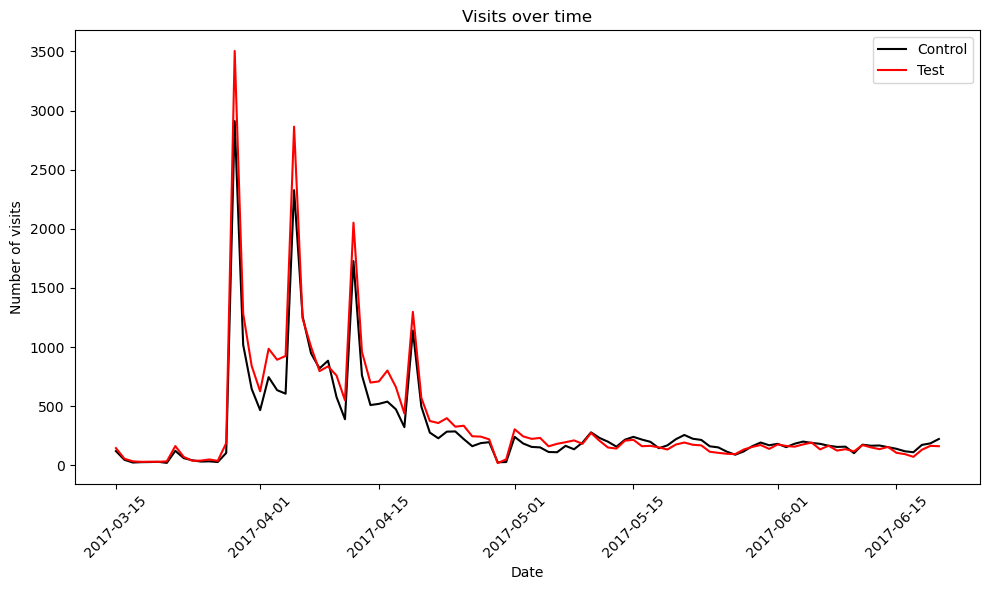

In [177]:
# Filter DataFrame for control variation
df_control = df_steps_sorted[df_steps_sorted['Variation'] == 'Control']
data_control = df_control.groupby('date_time')['visit_id'].nunique().reset_index()

# Filter DataFrame for test variation
df_test = df_steps_sorted[df_steps_sorted['Variation'] == 'Test']
data_test = df_test.groupby('date_time')['visit_id'].nunique().reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))

# Plot control variation
sns.lineplot(data=data_control, x='date_time', y='visit_id', label='Control', color = 'black')

# Plot test variation
sns.lineplot(data=data_test, x='date_time', y='visit_id', label='Test', color = 'red')

plt.title('Visits over time')
plt.xlabel('Date')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend()
plt.show()
